In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import numpy as np
from bs4 import BeautifulSoup

# Movies dataset:

In [2]:
movies = pd.read_csv(r"C:\Users\keerthi muthiki\OneDrive\Documents\data science intern exam\movies.csv")

In [3]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


### What is the shape of "movies.csv"?

In [4]:
movies.info

<bound method DataFrame.info of       movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  
0     Adventure|Animation|Children|Comedy|Fantasy  
1                      Adventure|Children|Fantasy  
2                                  Comedy|Romance  
3                            Comedy|Dra

# Ratings dataset:

In [5]:
ratings = pd.read_csv(r"C:\Users\keerthi muthiki\OneDrive\Documents\data science intern exam\ratings.csv")

In [6]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


### What is the shape of "ratings.csv"?

In [7]:
ratings.info

<bound method DataFrame.info of         userId  movieId  rating   timestamp
0            1        1     4.0   964982703
1            1        3     4.0   964981247
2            1        6     4.0   964982224
3            1       47     5.0   964983815
4            1       50     5.0   964982931
...        ...      ...     ...         ...
100831     610   166534     4.0  1493848402
100832     610   168248     5.0  1493850091
100833     610   168250     5.0  1494273047
100834     610   168252     5.0  1493846352
100835     610   170875     3.0  1493846415

[100836 rows x 4 columns]>

### How many unique "userId" are available in "ratings.csv"?

In [8]:
ratings["userId"].nunique()

610

# Merged data of Movies and Ratings dataset:

In [9]:
merge_df = pd.merge(movies, ratings, on='movieId', how='inner')
merge_df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


### Which movie has recieved maximum number of user ratings?

In [10]:
rating_counts = merge_df.groupby('title').size()
most_rated_movie = rating_counts.idxmax()
most_rated_movie

'Forrest Gump (1994)'

### What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [11]:
terminator_movie = movies[movies['title'] == "Terminator 2: Judgment Day (1991)"]
if not terminator_movie.empty:
    terminator_movie_id = terminator_movie['movieId'].values[0]
else:
    terminator_movie_id = None

if terminator_movie_id is not None:
    terminator_ratings = ratings[ratings['movieId'] == terminator_movie_id]
    average_rating = terminator_ratings['rating'].mean()
    print(f"Average rating for 'Terminator 2: Judgment Day (1991)': {average_rating:.2f}")
else:
    print("Movie not found.")

Average rating for 'Terminator 2: Judgment Day (1991)': 3.97


### How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

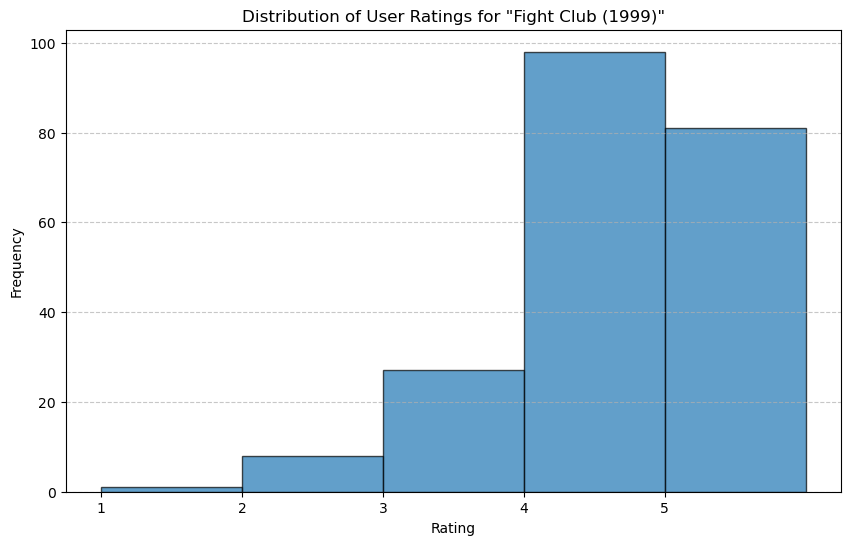

In [12]:
fight_club_movie = movies[movies['title'] == "Fight Club (1999)"]
if not fight_club_movie.empty:
    fight_club_movie_id = fight_club_movie['movieId'].values[0]
else:
    fight_club_movie_id = None

if fight_club_movie_id is not None:
    fight_club_ratings = ratings[ratings['movieId'] == fight_club_movie_id]
    
    plt.figure(figsize=(10, 6))
    plt.hist(fight_club_ratings['rating'], bins=range(1, 7), edgecolor='black', alpha=0.7)
    plt.title('Distribution of User Ratings for "Fight Club (1999)"')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.xticks(range(1, 6))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Movie not found.")

# Filtered and Merged data of Movies and Rating:

In [13]:
grouped_ratings = ratings.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()
grouped_ratings.columns = ['movieId', 'rating_count', 'rating_mean']

merged_df = pd.merge(movies, grouped_ratings, on='movieId', how='inner')

filtered_movies = merged_df[merged_df['rating_count'] > 50]

filtered_movies

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


### Which movie is the most popular based on  average user ratings?

In [14]:
most_popular_movie = filtered_movies.loc[filtered_movies['rating_mean'].idxmax()]

print("Most popular movie based on average user ratings:")
print(f"Title: {most_popular_movie['title']}")
print(f"Average Rating: {most_popular_movie['rating_mean']:.2f}")

Most popular movie based on average user ratings:
Title: Shawshank Redemption, The (1994)
Average Rating: 4.43


### Top 5 popular movies based on number of user ratings.

In [15]:
top_5_popular_movies = filtered_movies.sort_values(by='rating_count', ascending=False).head(5)

print("Top 5 popular movies based on number of user ratings:")
print(top_5_popular_movies[['title', 'rating_count']])

Top 5 popular movies based on number of user ratings:
                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1938                Matrix, The (1999)           278


### Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [16]:
sci_fi_movies = filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi')]

sci_fi_movies_sorted = sci_fi_movies.sort_values(by='rating_count', ascending=False)

third_most_popular_sci_fi_movie = sci_fi_movies_sorted.iloc[2]

print("Third most popular Sci-Fi movie based on number of user ratings:")
print(f"Title: {third_most_popular_sci_fi_movie['title']}")
print(f"Number of Ratings: {third_most_popular_sci_fi_movie['rating_count']}")

Third most popular Sci-Fi movie based on number of user ratings:
Title: Jurassic Park (1993)
Number of Ratings: 238


### Mention the movieId of the movie which has the highest IMDB rating.

In [34]:
highest_imdb = filtered_movies.loc[filtered_movies['rating_mean'].idxmax()]

print("Most popular movie based on average user ratings:")
print(f"movieid: {highest_imdb['movieId']}")
print(f"Average Rating: {highest_imdb['rating_mean']:.2f}")

Most popular movie based on average user ratings:
movieid: 318
Average Rating: 4.43


### Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [36]:
sci_fi_movies = filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi')]

highest_rated_sci_fi_movie = sci_fi_movies.loc[sci_fi_movies['rating_mean'].idxmax()]
highest_rated_sci_fi_movie["movieId"]

260

# Tags dataset:

In [17]:
tags = pd.read_csv(r"C:\Users\keerthi muthiki\OneDrive\Documents\data science intern exam\tags.csv")

In [18]:
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


### Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [19]:
matrix_movie = movies[movies['title'] == "Matrix, The (1999)"]
if not matrix_movie.empty:
    matrix_movie_id = matrix_movie['movieId'].values[0]
else:
    matrix_movie_id = None

if matrix_movie_id is not None:
    matrix_tags = tags[tags['movieId'] == matrix_movie_id]
    print(matrix_tags)
else:
    print("Movie not found.")

      userId  movieId                 tag   timestamp
815      424     2571        martial arts  1457842912
816      424     2571              sci-fi  1457842899
1646     474     2571  alternate universe  1137204991
2794     537     2571          philosophy  1424141098
2795     537     2571    post apocalyptic  1424141101


# Links dataset:

In [20]:
links = pd.read_csv(r"C:\Users\keerthi muthiki\OneDrive\Documents\data science intern exam\links.csv")

In [21]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [22]:
def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find('sc-bde20123-1 cMEQkK', attrs={'itemprop' : 'ratingValue'})
    return imdb_rating.text if imdb_rating else np.nan

In [23]:
imdbId = "0111161"  # Replace with the IMDb ID you want to scrape
rating = scrapper(imdbId)
print("IMDb Rating:", rating)

IMDb Rating: nan


# Merged data of Movies and Links:

In [24]:
meg_mov_lin_df = pd.merge(movies, links, on='movieId', how='inner')
meg_mov_lin_df

,movieId,title,genres,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885,31357.0
4,5,Father of the Bride Part II (1995),Comedy,113041,11862.0
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,5476944,432131.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,5914996,445030.0
9739,193585,Flint (2017),Drama,6397426,479308.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,8391976,483455.0
